# TD2 — Analyse Spectrale (FFT)  
Ce projet présente une implémentation Python de l’analyse spectrale demandée au TD2.
Objectifs :
- Synthétiser des signaux (combinaison de cosinus) dans le **domaine temporel**
- Échantillonner avec une fréquence `fs` et un nombre d’échantillons `N`
- Calculer la **FFT** et afficher le **spectre d’amplitude unilatéral** \(|X(f)|\)
- Faire varier `fs` pour mettre en évidence le **repliement spectral (aliasing)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## 1) Outils : FFT unilatérale et fonctions de tracé

On utilise `fft` afin de ne garder que les fréquences positives.
Une normalisation est appliquée pour obtenir des amplitudes comparables à celles des cosinus d’origine
(quand la fréquence tombe sur un bin FFT).

In [12]:
def spectre_unilateral_amplitude(x, fs):
    """
    Calcule le spectre d'amplitude unilatéral |X(f)| d'un signal réel.

    Paramètres
    ----------
    x : array-like
        Signal échantillonné (N points).
    fs : float
        Fréquence d'échantillonnage en Hz.

    Retour
    ------
    f : ndarray
        Axe fréquentiel (Hz) côté positif.
    mag : ndarray
        Amplitude unilatérale |X(f)|.
    """
    N = len(x)
    X = np.fft.rfft(x)
    f = np.fft.rfftfreq(N, d=1/fs)

    mag = np.abs(X) / N
    if len(mag) > 2:
        mag[1:-1] *= 2  # conversion en spectre unilatéral (hors DC et Nyquist)
    return f, mag


def afficher_temps_et_fft(t, x, fs, titre, fmax=None, tmax=None, savebase=None):
    """Affiche (et optionnellement sauvegarde) le signal temporel et son spectre FFT."""
    f, mag = spectre_unilateral_amplitude(x, fs)

    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.title(f"{titre} — Domaine temporel (fs={fs/1000:.1f} kHz, N={len(x)})")
    if tmax is not None:
        plt.xlim(0, tmax)
    plt.grid(True, alpha=0.3)
    if savebase is not None:
        plt.savefig(str(savebase) + ".time.png", dpi=160, bbox_inches="tight")

    plt.figure()
    plt.stem(f, mag)
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("|X(f)| (amplitude unilatérale)")
    plt.title(f"{titre} — Spectre (FFT)")
    if fmax is not None:
        plt.xlim(0, fmax)
    plt.grid(True, alpha=0.3)
    if savebase is not None:
        plt.savefig(str(savebase) + ".fft.png", dpi=160, bbox_inches="tight")

## 2) Définition des signaux (d’après l’énoncé du TD)

###  x1(t)=cos(2π⋅1000t)
### 𝑥2(𝑡)=𝑥1(𝑡)+2cos⁡(2𝜋⋅2000 𝑡)
### x(t)=x2(t)+5cos(2π⋅8000t)   
### Expression du signal final
### En remplaçant 𝑥2(𝑡)
### x2(t) par son expression, on obtient directement :
### 𝑥(𝑡)=cos(2𝜋1000𝑡)+2cos⁡ ⁣(2𝜋2000𝑡)+5cos(2𝜋8000𝑡)
### x(t)=cos(2π⋅1000t)+2cos(2π⋅2000t)+5cos(2π⋅8000t)
	​

In [6]:
# Fréquences (Hz)
f1, f2, f3 = 1000.0, 2000.0, 8000.0

def x1(t):
    return 1.0 * np.cos(2*np.pi*f1*t)

def x2(t):
    return x1(t) + 2.0 * np.cos(2*np.pi*f2*t)

def x(t):
    return x2(t) + 5.0 * np.cos(2*np.pi*f3*t)

## 3) Étude principale — fs = 20 kHz, N = 1000

Avec `fs = 20 kHz`, la fréquence de Nyquist vaut `10 kHz`.
On devrait donc voir clairement les pics à 1 kHz, 2 kHz et 8 kHz, sans aliasing.

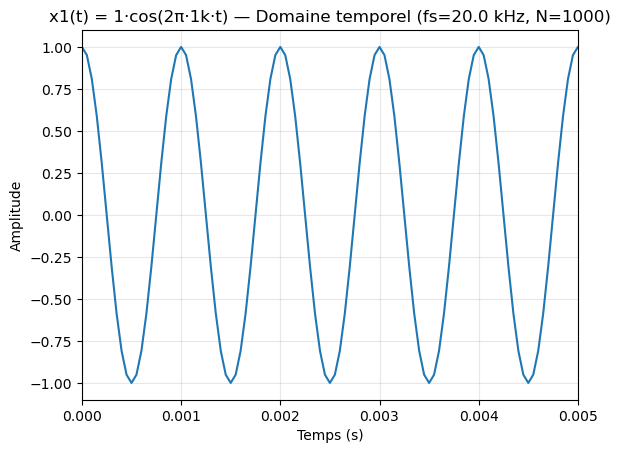

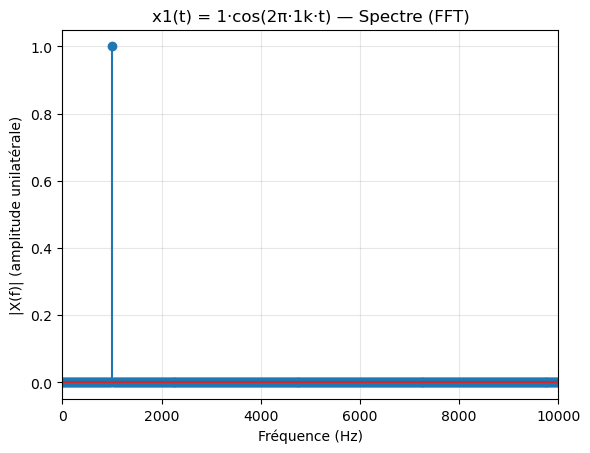

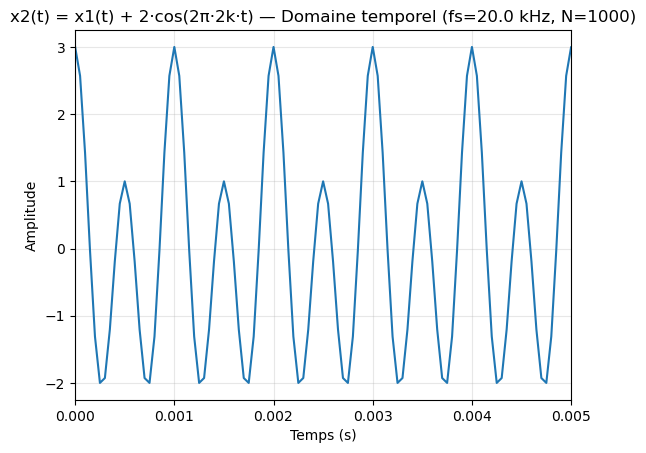

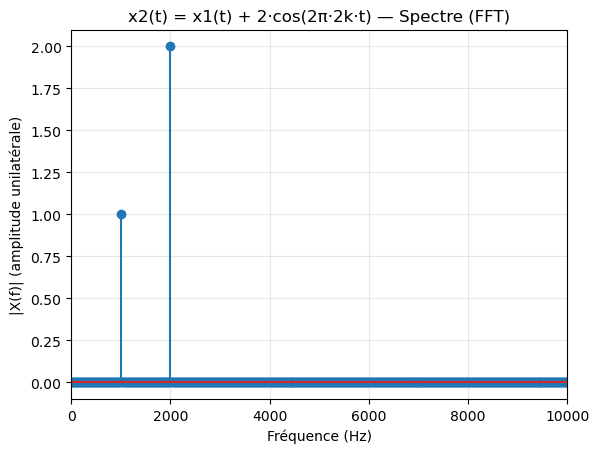

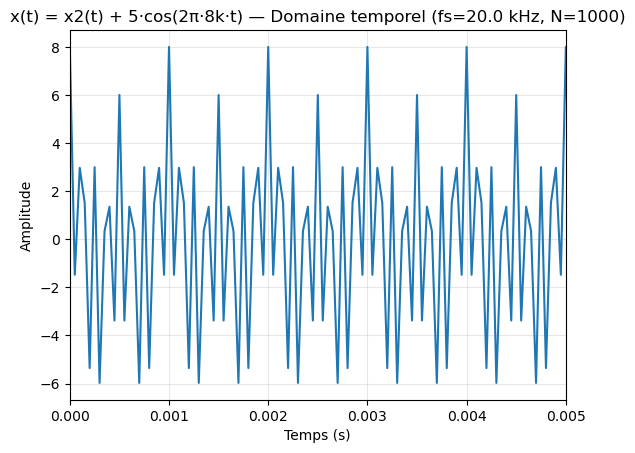

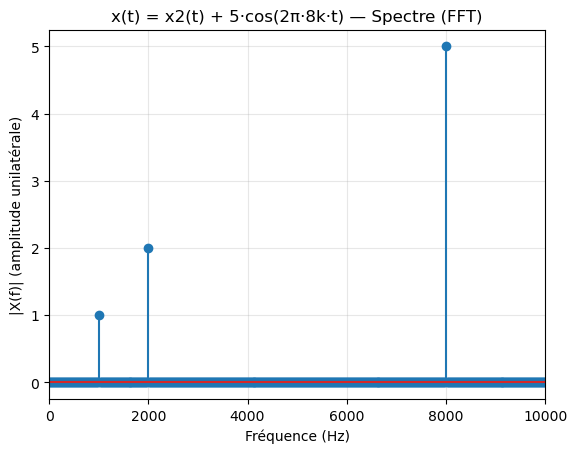

In [8]:
N = 1000
fs = 20000.0

t = np.arange(N) / fs

afficher_temps_et_fft(t, x1(t), fs, "x1(t) = 1·cos(2π·1k·t)", fmax=10000, tmax=0.005)
afficher_temps_et_fft(t, x2(t), fs, "x2(t) = x1(t) + 2·cos(2π·2k·t)", fmax=10000, tmax=0.005)
afficher_temps_et_fft(t,  x(t), fs, "x(t) = x2(t) + 5·cos(2π·8k·t)", fmax=10000, tmax=0.005)

plt.show()

## 4) Cas aliasing — fs = 8 kHz, N = 1000

Ici, Nyquist = 4 kHz. La composante à 8 kHz dépasse donc `fs/2` : elle ne peut plus être représentée
correctement et se replie dans la bande observable.

On observe alors un spectre limité à \([0, 4000]\) Hz, avec un effet d’aliasing sur la composante 8 kHz.

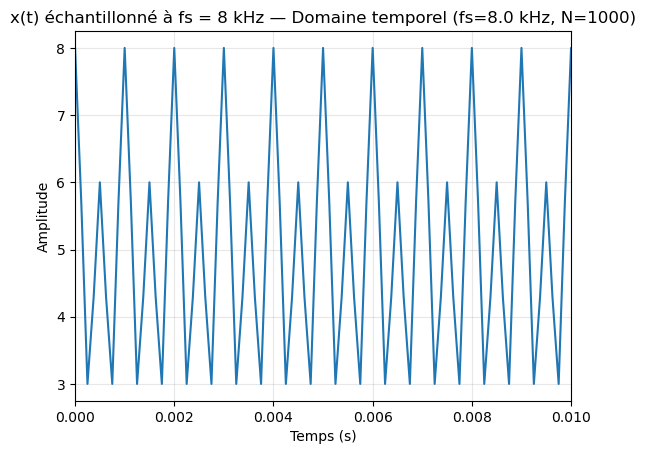

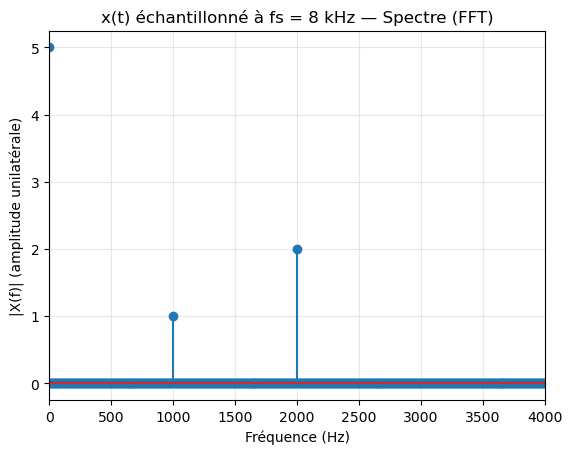

In [13]:
fs_alias = 8000.0
t_alias = np.arange(N) / fs_alias

afficher_temps_et_fft(t_alias, x(t_alias), fs_alias, "x(t) échantillonné à fs = 8 kHz", fmax=fs_alias/2, tmax=0.01)
plt.show()

## 4) Cas aliasing — fs = 8 kHz, N = 1000

Ici, Nyquist = 4 kHz. La composante à 8 kHz dépasse donc `fs/2` : elle ne peut plus être représentée
correctement et se replie dans la bande observable.

On observe alors un spectre limité à \([0, 4000]\) Hz, avec un effet d’aliasing sur la composante 8 kHz.

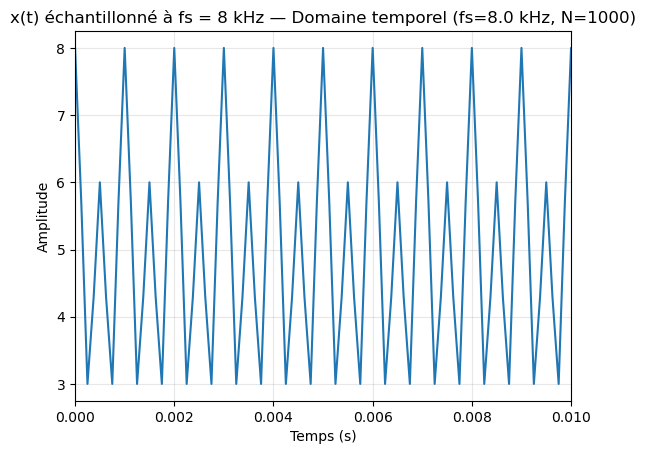

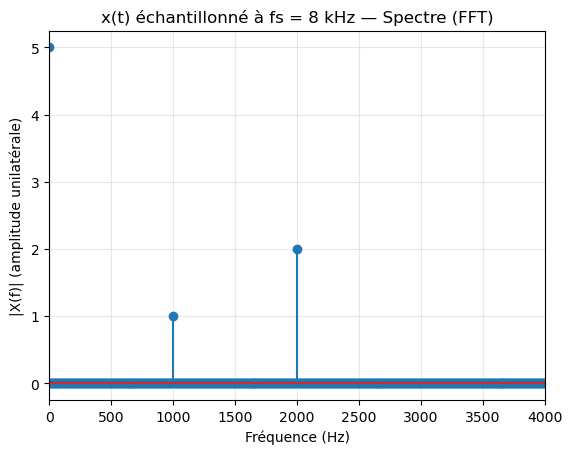

In [9]:
fs_alias = 8000.0
t_alias = np.arange(N) / fs_alias

afficher_temps_et_fft(t_alias, x(t_alias), fs_alias, "x(t) échantillonné à fs = 8 kHz", fmax=fs_alias/2, tmax=0.01)
plt.show()

## 5) Balayage de fs — de 20 kHz à 1 kHz (pas de 1 kHz)

On diminue progressivement `fs` tout en gardant `N=1000`.
Le notebook peut **enregistrer automatiquement** les figures dans un dossier afin de faciliter
leur insertion dans un compte rendu.

À suivre :
- Lorsque `fs < 16 kHz`, la composante à 8 kHz ne respecte plus le critère de Nyquist → repliement visible.

C:\Users\HP\AppData\Local\Temp\ipykernel_18848\777474482.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


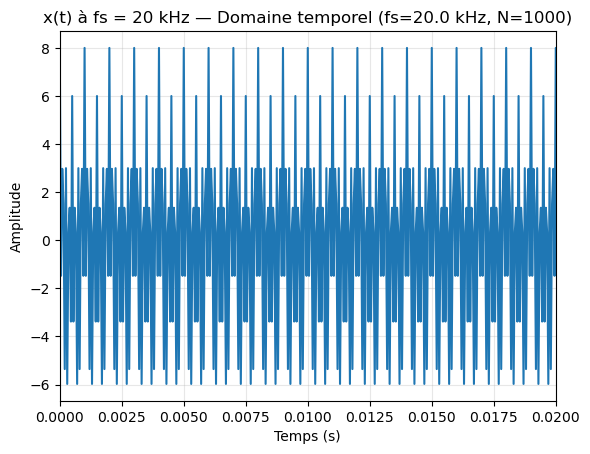

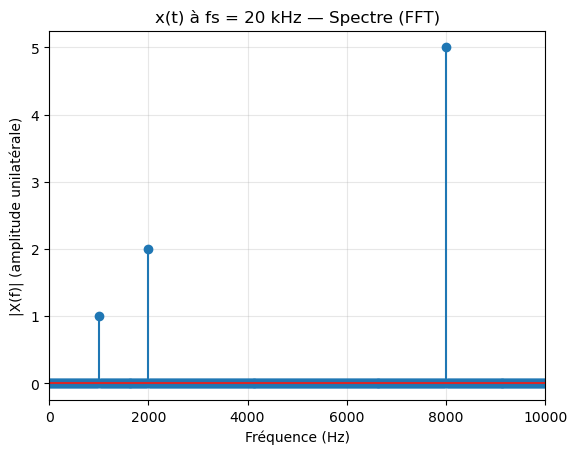

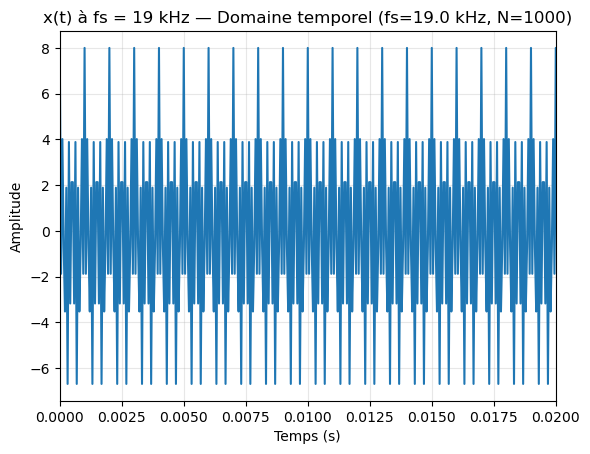

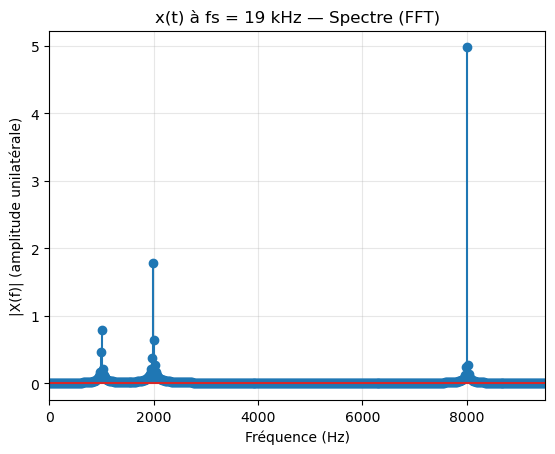

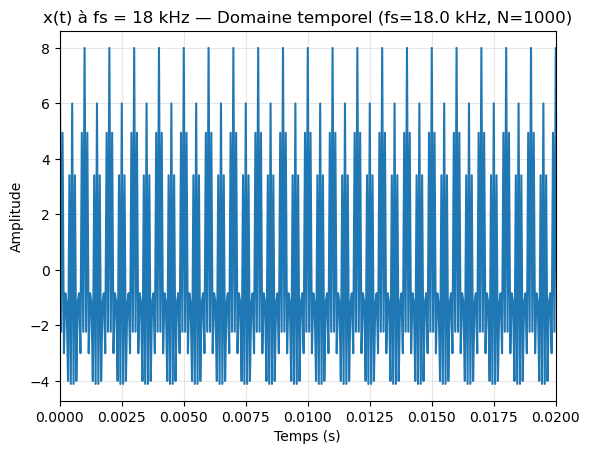

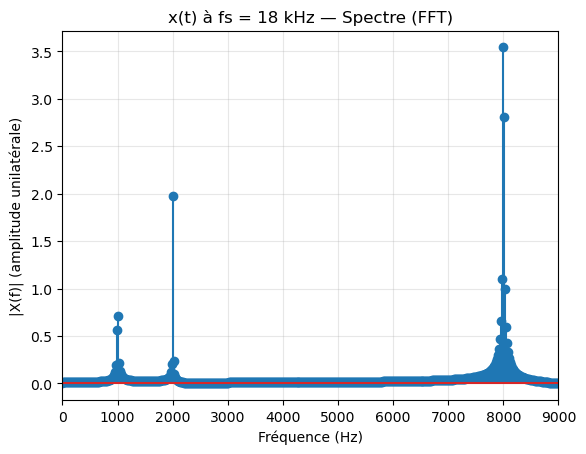

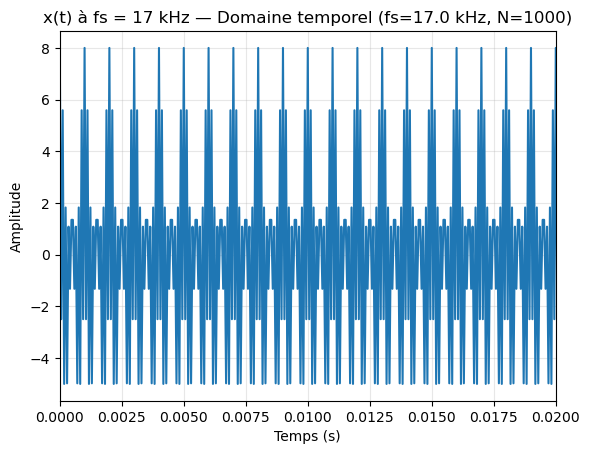

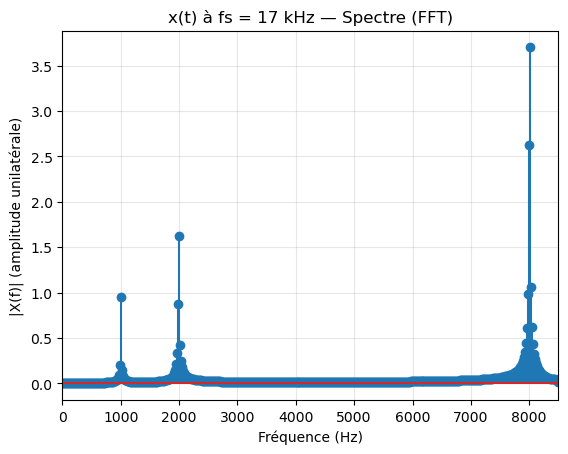

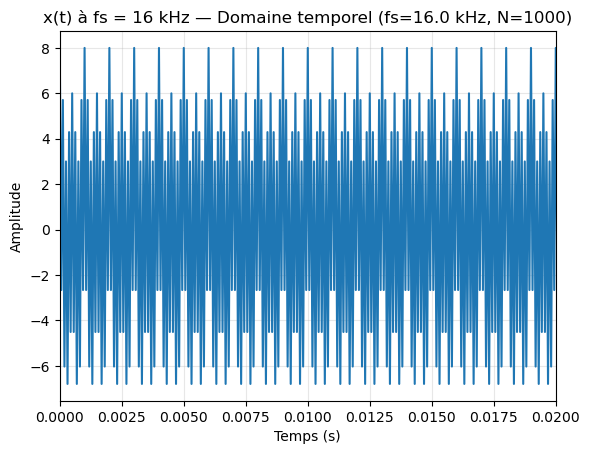

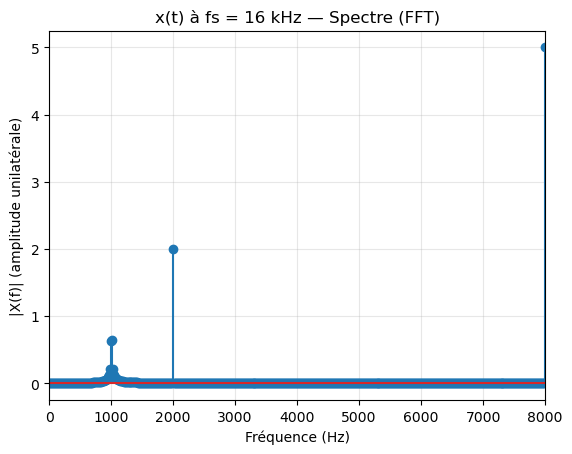

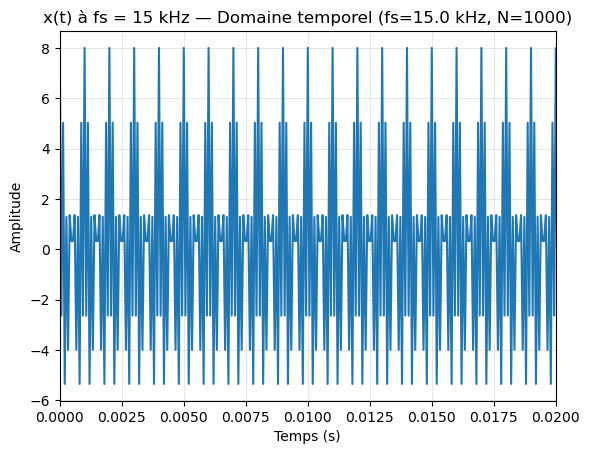

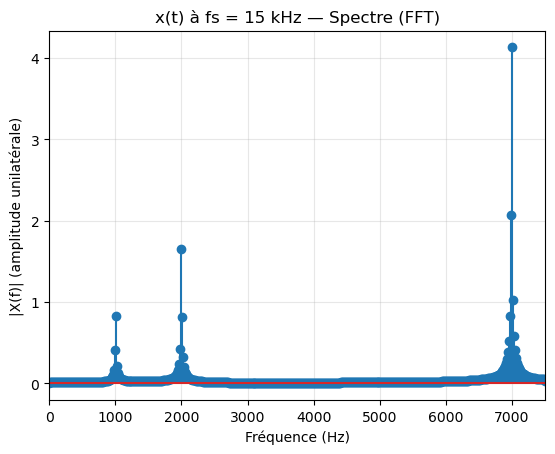

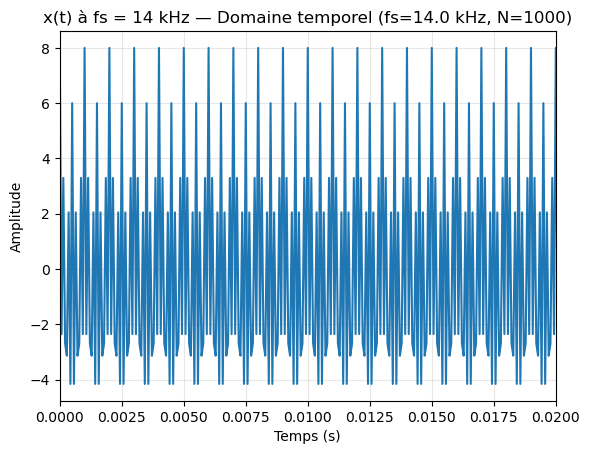

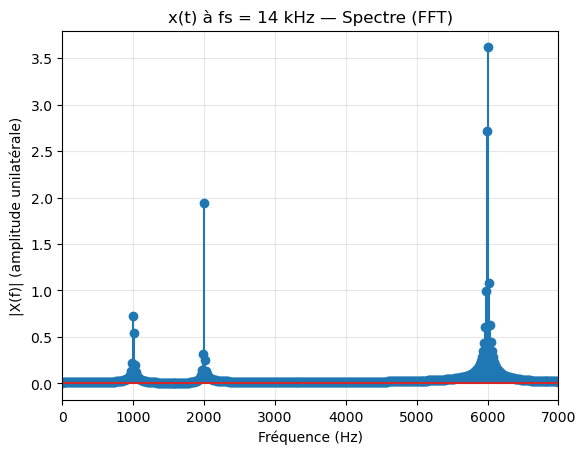

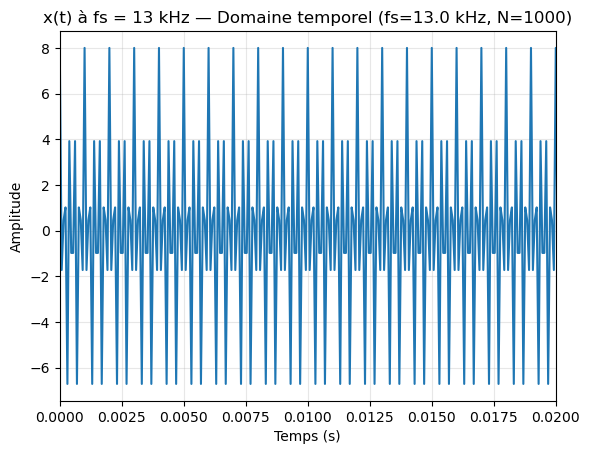

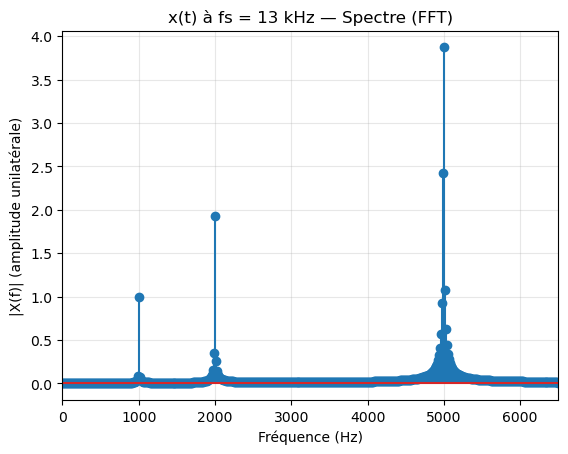

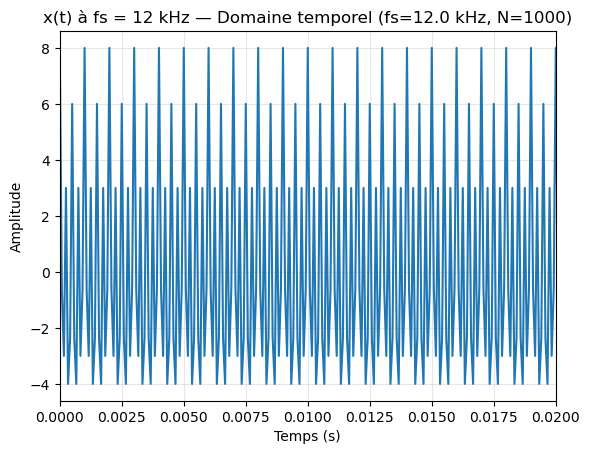

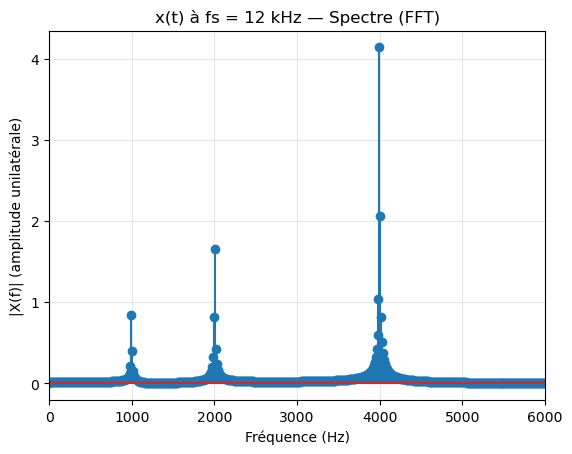

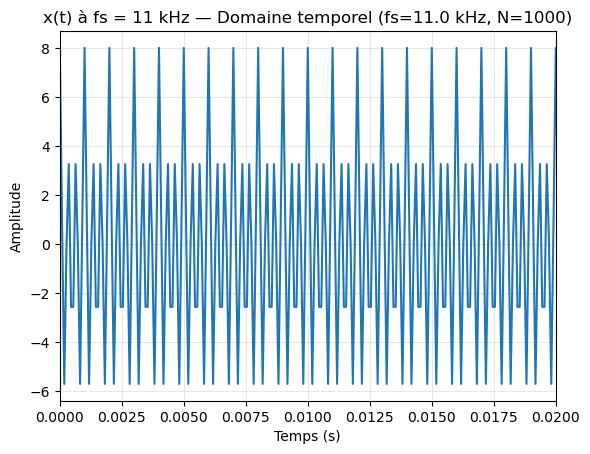

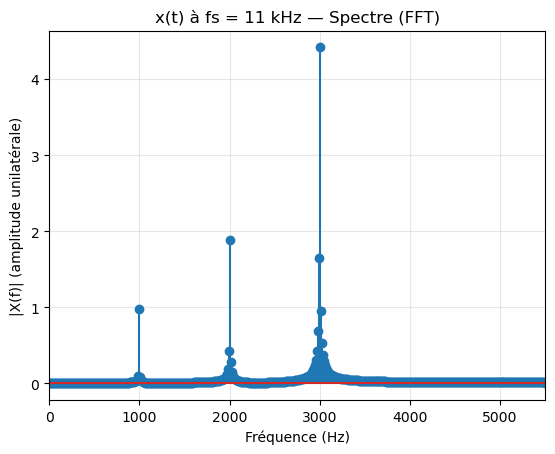

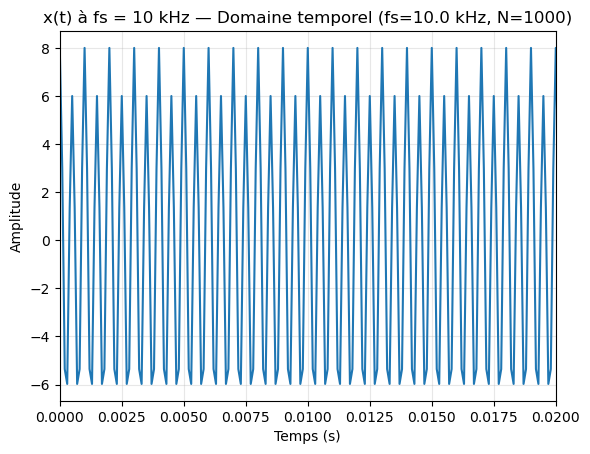

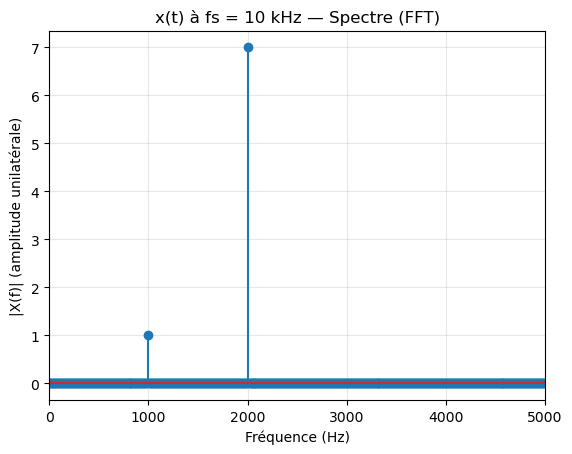

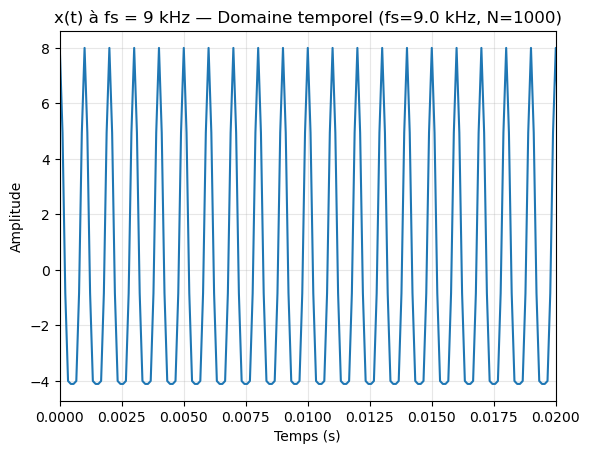

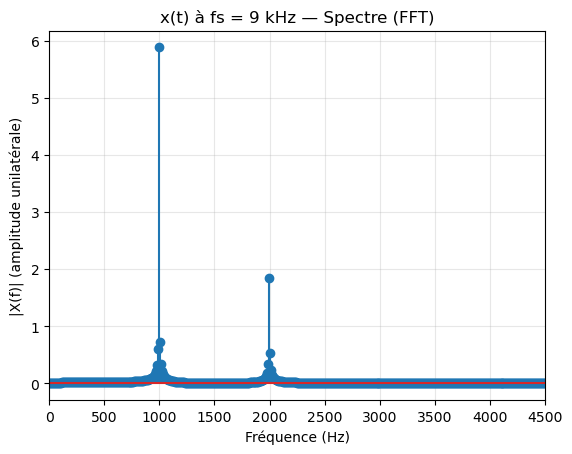

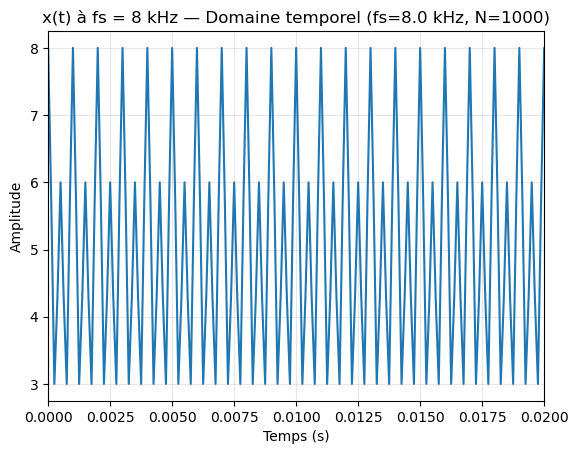

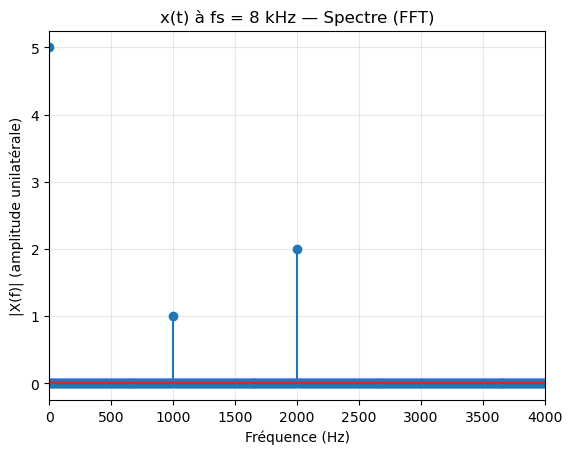

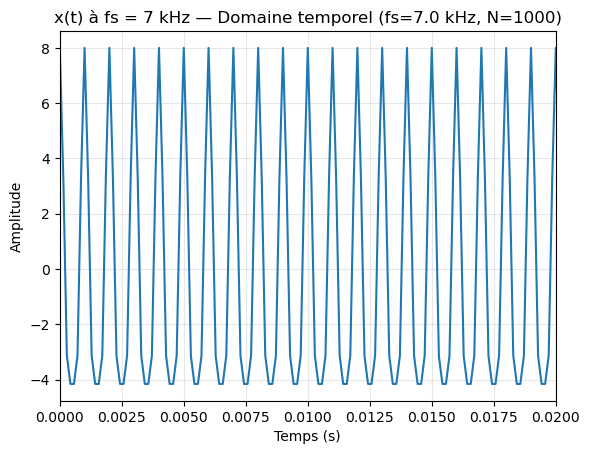

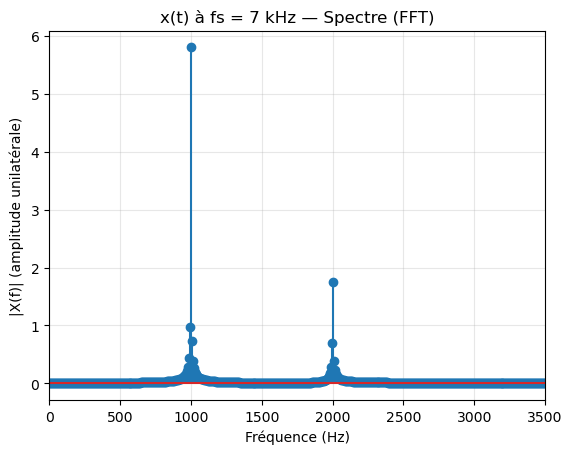

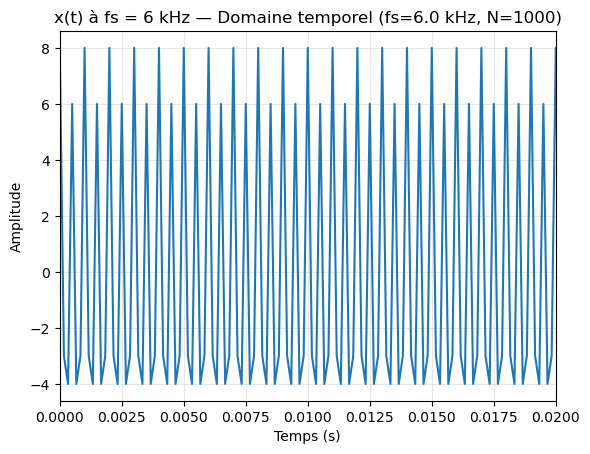

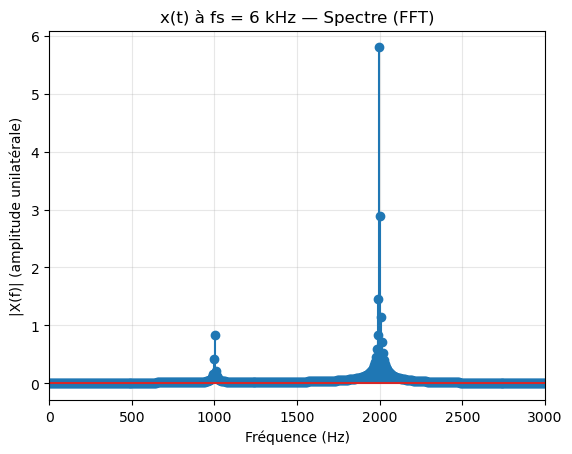

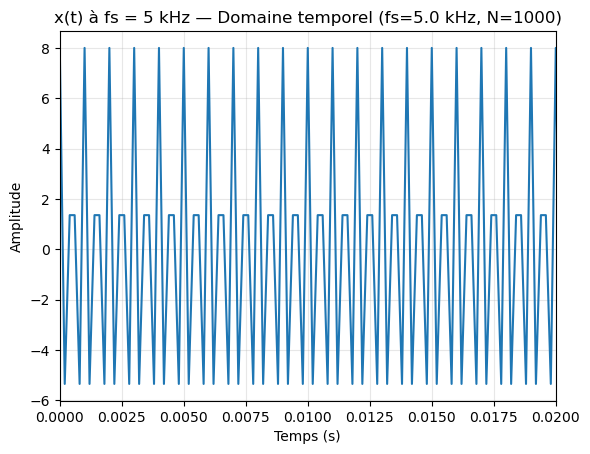

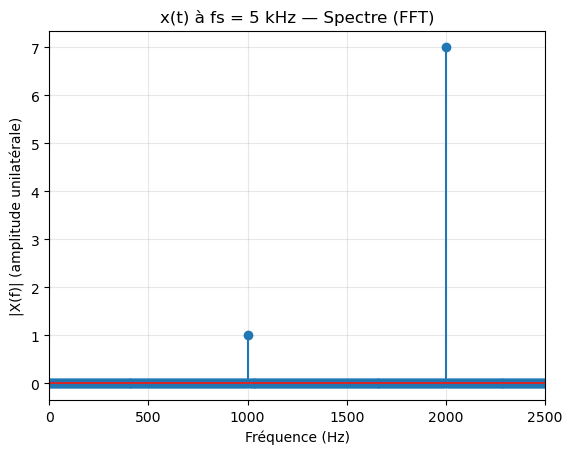

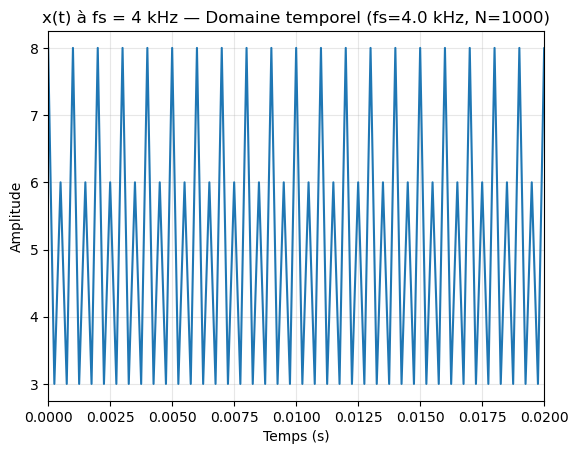

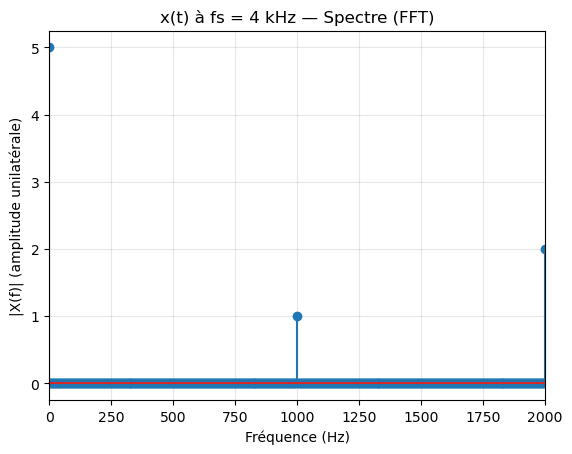

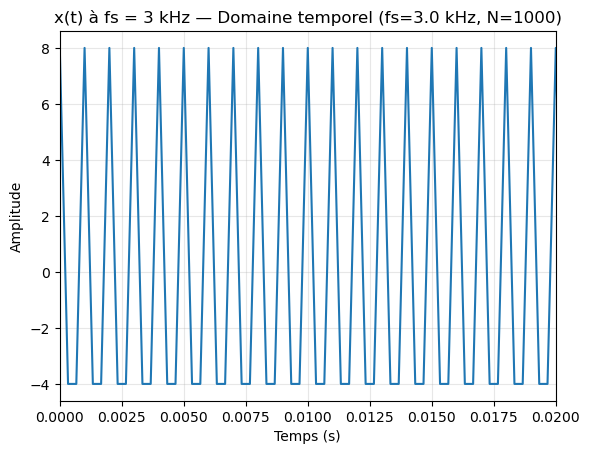

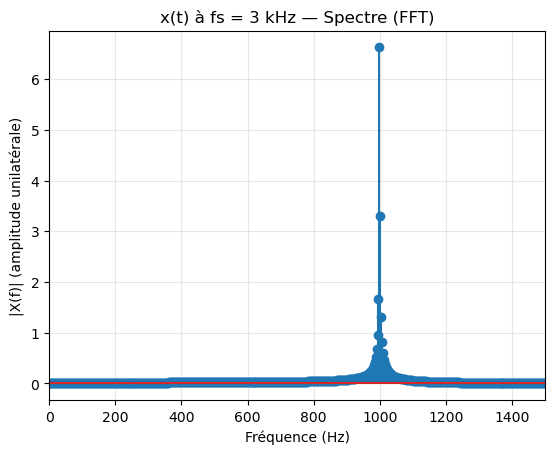

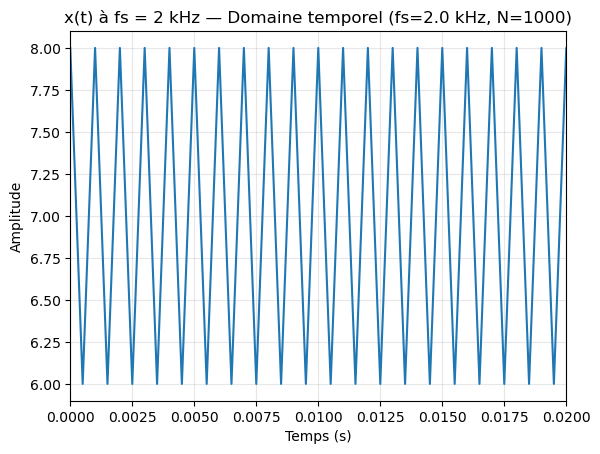

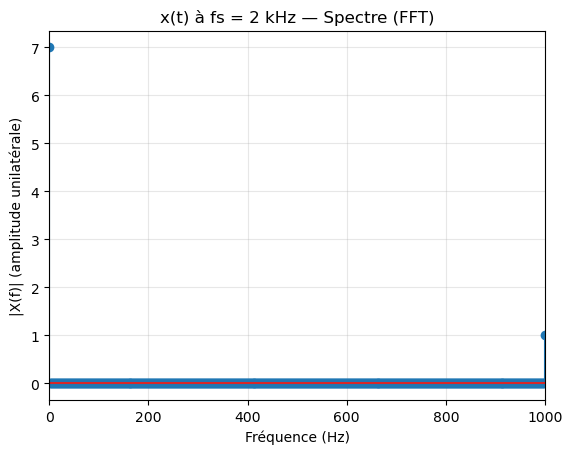

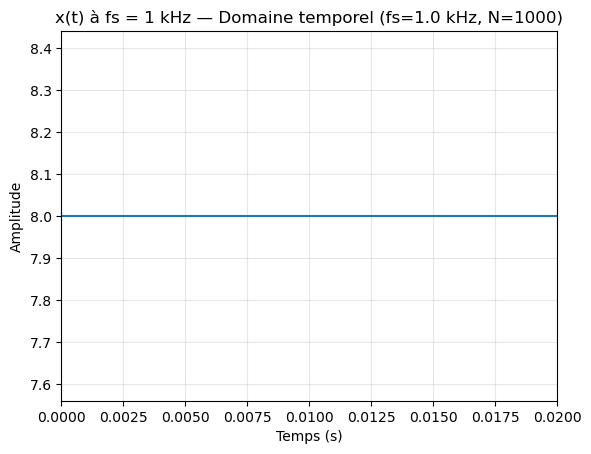

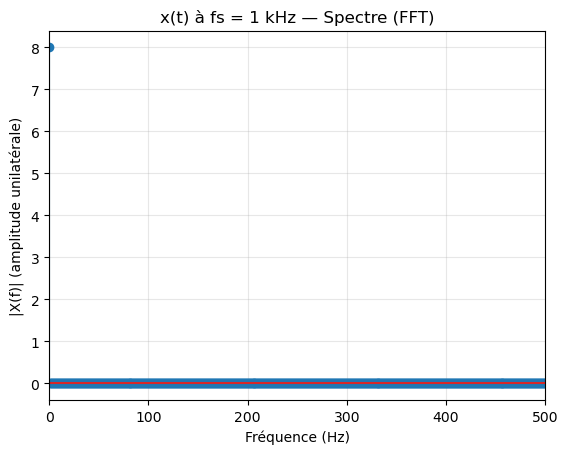

Figures enregistrées dans : C:\Users\HP\Documents\td2_fft_outputs


In [11]:
dossier_sortie = Path("td2_fft_outputs")
dossier_sortie.mkdir(exist_ok=True)

for fs_khz in range(20, 0, -1):  # 20, 19, ..., 1 kHz
    fs_courant = fs_khz * 1000.0
    tt = np.arange(N) / fs_courant
    sig = x(tt)

    base = dossier_sortie / f"x_fs_{fs_khz:02d}kHz"

    afficher_temps_et_fft(
        tt, sig, fs_courant,
        titre=f"x(t) à fs = {fs_khz} kHz",
        fmax=fs_courant/2,
        tmax=min(0.02, N/fs_courant),
        savebase=base
    )

plt.show()
print(f"Figures enregistrées dans : {dossier_sortie.resolve()}")